In [31]:
#Import the packages and Dataset
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline 

In [32]:
data = pd.read_csv('C:\\Users\\U29737\\Documents\\EdX\\world-development-indicators\\Indicators.csv') #Windows
#data = pd.read_csv('./world-development-indicators/Indicators.csv') #Linux
data.shape

(5656458, 6)

In [33]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Check if there are any null values present in the dataset.

In [34]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [35]:
# select Out of School Children of Primary School age in India
hist_indicator_all = 'SE.PRM.UNER'
hist_indicator_male = 'SE.PRM.UNER.MA'
hist_indicator_female = 'SE.PRM.UNER.FE'
hist_indicator_GDP = 'NY.GDP.PCAP.CD' #'SE.XPD.PRIM.PC.ZS'#  
hist_country = 'IND'

mask1 = data['IndicatorCode'].str.contains(hist_indicator_all) 
mask2 = data['IndicatorCode'].str.contains(hist_indicator_male) 
mask3 = data['IndicatorCode'].str.contains(hist_indicator_female) 
mask4 = data['CountryCode'].str.contains(hist_country)
mask5 = data['IndicatorCode'].str.contains(hist_indicator_GDP) 



# stage is just those indicators matching the USA for country code and CO2 emissions over time.
#stage = data[mask1 & mask2 & mask3 & mask4]
stage_all = data[mask1  & mask4]
stage_male = data[mask2 & mask4]
stage_female = data[mask3 & mask4]
stage_gdp = data[mask5 & mask4]


In [36]:
#year_list = ['2000','2001','2002','2003','2007','2008','2009','2010','2011','2012'] #Works with Linux not Windows
year_list = [2000,2001,2002,2003,2007,2008,2009,2010,2011,2012]  #works with Windows

stage_gdp = stage_gdp[stage_gdp['Year'].isin(year_list)] 
stage_all = stage_all[stage_all['IndicatorCode'] == 'SE.PRM.UNER'] 
stage_all = stage_all[stage_all['Year'].isin(year_list)]
#stage_female = stage_female[stage_female['Year'].isin(year_list)]  
#stage_male = stage_male[stage_male['Year'].isin(year_list)]  

In [37]:
# How many years of data do we have ?
years = stage_all['Year'].unique().tolist()
print('No of Children Dataset')
print(len(years))
print(min(years)," to ",max(years))
years = stage_gdp['Year'].unique().tolist()
print('GDP Dataset')
print(len(years))
print(min(years)," to ",max(years))

No of Children Dataset
10
2000  to  2012
GDP Dataset
10
2000  to  2012


In [38]:
stage_all

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3246084,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2000,16947662.0
3398394,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2001,16891852.0
3551018,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2002,17031052.0
3705260,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2003,10960947.0
4387559,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2007,1091960.0
4567875,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2008,508133.0
4747002,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2009,1218431.0
4929849,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2010,875082.0
5111617,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2011,1387374.0
5287305,India,IND,"Out-of-school children of primary school age, ...",SE.PRM.UNER,2012,1723585.0


In [39]:
# get the years
years_male = stage_male['Year'].values 
Out_of_school_children_male = stage_male['Value'].values

years_female = stage_female['Year'].values 
Out_of_school_children_female = stage_female['Value'].values

years_male = stage_all['Year'].values 
Out_of_school_children_all = stage_all['Value'].values

years_gdp = stage_gdp['Year'].values 
gdp = stage_gdp['Value'].values


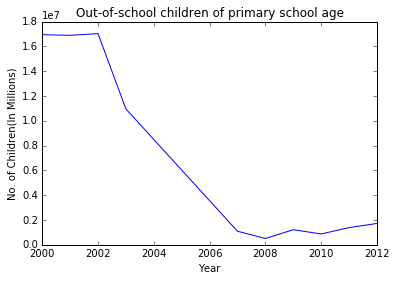

In [40]:
# Line plot
plt.plot(stage_all['Year'].values, stage_all['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('No. of Children(In Millions)')

#label the figure
plt.title('Out-of-school children of primary school age',fontsize=12)
plt.show()

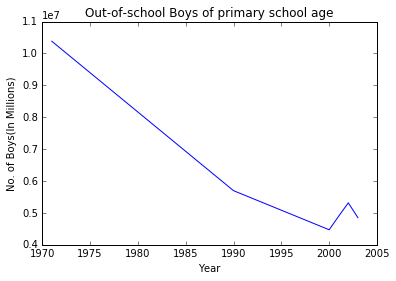

In [41]:
# Line plot
plt.plot(stage_male['Year'].values, stage_male['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('No. of Boys(In Millions)')

#label the figure
plt.title('Out-of-school Boys of primary school age',fontsize=12)
plt.show()

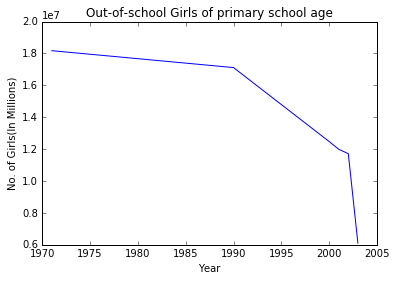

In [42]:
# Line plot
plt.plot(stage_female['Year'].values, stage_female['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('No. of Girls(In Millions)')

#label the figure
plt.title('Out-of-school Girls of primary school age',fontsize=12)
plt.show()

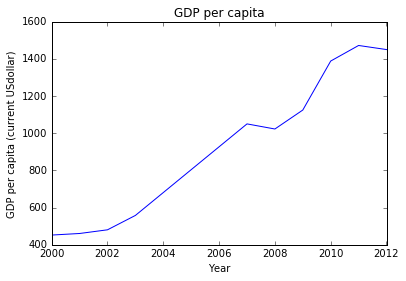

In [43]:
# Line plot
plt.plot(stage_gdp['Year'].values, stage_gdp['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('GDP per capita (current USdollar)')

#label the figure
plt.title('GDP per capita',fontsize=12)
plt.show()

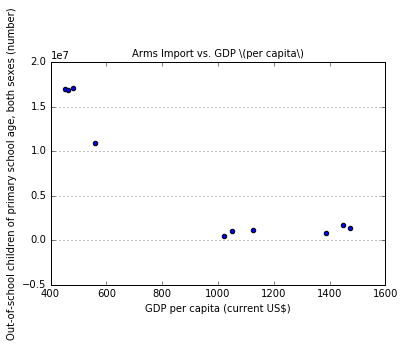

In [44]:
fig,axis=plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Arms Import vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(stage_gdp['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage_all['IndicatorName'].iloc[0],fontsize=10)
X=stage_gdp['Value']
Y=stage_all['Value']
axis.scatter(X, Y)
plt.show()

In [45]:
np.corrcoef(stage_gdp['Value'],stage_all['Value'])


array([[ 1.        , -0.90842856],
       [-0.90842856,  1.        ]])